# Twitter Data Analysis and Modeling

## Setting up

importing relevant packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer


importnig processing scripts

In [3]:
from extract_dataframe import read_json         # a function to load json_data 
from extract_dataframe import TweetDfExtractor  # and a class to extract relevant variables.    
from clean_tweets_dataframe import Clean_Tweets        # collection of functions to for cleaning the dataframe.

Loading JSON file, selecting relevant variables, and generating a CSV file.

In [4]:
_, tweet_list = read_json("data/Economic_Twitter_Data.json")
tweet = TweetDfExtractor(tweet_list)
tweet.get_tweet_df(True)  # this will also generate a CSV file.
print("Please, load the CSV file")

File Successfully Saved.!!!
Please, load the CSV file


Loading CSV file

In [5]:
tweet_df = pd.read_csv('processed_tweet_data.csv')  # loads the csv file created above.

## Data Cleaning

Running common data cleaning operations from the Clean_Tweets class...!!!

In [6]:
cleaner = Clean_Tweets(tweet_df)
tweet_df = cleaner.drop_unwanted_column(tweet_df)
tweet_df = cleaner.drop_duplicate(tweet_df)
tweet_df = cleaner.convert_to_datetime(tweet_df)
tweet_df = cleaner.convert_to_numbers(tweet_df)
clean_tweet_df = cleaner.remove_non_english_tweets(tweet_df)

Data cleaning in Action...!!!
Unwanted_columns successfully removed
Duplicate rows successfully removed
Strings successfully converted to datetime object
Strings successfully converted to numeric object
Non-English languages succesfully removed


## Data Exploration and Reorganization

In [7]:
clean_tweet_df.shape   # checking the number of columns and rows.

(16374, 17)

In [8]:
clean_tweet_df.info()  # checking available columns, their datatypes and Null count

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16374 entries, 38 to 24622
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   created_at          16374 non-null  datetime64[ns, UTC]
 1   source              16374 non-null  object             
 2   original_text       16374 non-null  object             
 3   clean_text          16371 non-null  object             
 4   polarity            16374 non-null  float64            
 5   subjectivity        16374 non-null  float64            
 6   screen_name         16374 non-null  object             
 7   language            16374 non-null  object             
 8   retweet_count       16374 non-null  int64              
 9   friends_count       16374 non-null  int64              
 10  hashtags            16374 non-null  object             
 11  statuses            16374 non-null  int64              
 12  followers_count     16374 non-n

In [9]:
clean_tweet_df.nunique() # checks unique values in each columns

created_at            15675
source                   53
original_text         15082
clean_text            15022
polarity               1047
subjectivity            877
screen_name             464
language                  1
retweet_count          1718
friends_count           394
hashtags               4293
statuses                458
followers_count         426
user_mentions          7939
possibly_sensitive        2
favourites_count        458
location                220
dtype: int64

<h3>Observation:</h3>
    <li> There are a total of 16374 obsrvations and 17 variables </li>
    <li> There are 464 unique users</li>
    <li> There are 220 unique locations.</li>

In [ ]:
clean_tweet_df.head()  #checking the top 6 rows.

In [10]:
clean_tweet_df.describe()   # summarizing numerical columns.

,polarity,subjectivity,retweet_count,friends_count,statuses,followers_count,favourites_count
count,16374.000000,16374.000000,16374.000000,16374.000000,1.637400e+04,1.637400e+04,16374.000000
mean,0.083105,0.295141,627.341151,1337.912056,4.503068e+04,5.359397e+04,22503.216563
std,0.271508,0.314911,7104.387606,2975.315626,1.473958e+05,4.328630e+05,49450.473604
min,-1.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000e+00,0.000000
25%,0.000000,0.000000,0.000000,113.000000,1.610000e+03,1.120000e+02,542.000000
50%,0.000000,0.233333,2.000000,437.000000,7.322000e+03,5.430000e+02,4295.000000
75%,0.200000,0.500000,34.000000,1433.000000,3.159900e+04,2.131000e+03,20269.000000
max,1.000000,1.000000,434379.000000,41866.000000,2.307455e+06,6.027402e+06,529419.000000


<h3>Observation:</h3>
    <li>75% of polarity values are below or equal to 0.2, which suggests negative polarity</li>
    <li>75% of subjectivity values are below or equal to 0.5, which suggests prevalence of opinions rather than facts</li>

selection and reorganization of variables

In [38]:
# selecting only the relevant variables for further analysis
sho_tweet_df = clean_tweet_df.drop(['original_text', 'source', 'user_mentions', 'possibly_sensitive'], axis=1)
loc_tweet_df = sho_tweet_df.dropna() # droping rows with null values

#resetting indexes
sho_tweet_df = sho_tweet_df.reset_index();
sho_tweet_df = sho_tweet_df.drop(columns=['index'])

loc_tweet_df = loc_tweet_df.reset_index();
loc_tweet_df = loc_tweet_df.drop(columns=['index'])

print(clean_tweet_df.shape)
print(sho_tweet_df.shape)
print(loc_tweet_df.shape)

(16374, 17)
(16374, 13)
(10669, 13)


creating a new variable: sentiment

In [14]:
def sentiment_group (p): 
    if p > 0:
        return 'positive'
    elif p < 0:
        return 'negative'
    else:
        return 'neutral'

In [15]:
sentiment = pd.Series([sentiment_group(row_val) for row_val in list(loc_tweet_df['polarity'])])




In [39]:
sho_tweet_df = pd.concat([sho_tweet_df, sentiment.rename("sentiment")], axis=1)
loc_tweet_df = pd.concat([loc_tweet_df, sentiment.rename("sentiment")], axis=1)



### Analysis and Visualization


Location based explorations

In [ ]:
plt.scatter(df.retweet_count, df.favorite_count)

In [24]:
# loading countries basic information module and extracting african countries
from countries_info import countries
african_countries = []
for item in countries:
    if item['continent'] == 'Africa':
        african_countries.append(item['name'])
        african_countries.append(item['capital'])
    

# extracting countries from africa 
ava_countries = {}
for item in clean_tweet_df.location:
    if item in african_countries:
        if item not in ava_countries:
            ava_countries[item] = 1
        else:
            ava_countries[item] = ava_countries[item]+1

print("\ntweet_count summary by african countries\n")
# the count of tweets in association with each african countries.            
afr_df = pd.DataFrame ({ 'places': ava_countries.keys(), 'tweet_count': ava_countries.values()})
afr_df.sort_values(by=['tweet_count'], inplace=True, ascending = False)
afr_df['percentage'] = ((afr_df['tweet_count']/loc_tweet_df.shape[0])*100).round(1)
print("\n",afr_df, "\n")

# the tweet dataframe filtered by african countries
afr_list = list(ava_countries.keys())
afr_tweets_df = loc_tweet_df[loc_tweet_df['location'].isin(afr_list)]

print("tweet count summary by top 10 global countries\n")

top_loc = loc_tweet_df.groupby(['location']).size().sort_values(ascending=False).to_frame().reset_index().head(10)
top_loc.columns = ['places', 'tweet_count']
top_loc['percentage'] = ((top_loc['tweet_count']/loc_tweet_df.shape[0])*100).round(1)

print(top_loc)
    



tweet_count summary by african countries


          places  tweet_count  percentage
2         Kenya          133         0.8
0  South Africa           93         0.6
1       Namibia           41         0.2
3     Mauritius           25         0.2 

tweet count summary by top 10 global countries

            places  tweet_count  percentage
0            India          518         3.1
1    United States          254         1.5
2        Sri Lanka          228         1.4
3  London, England          195         1.2
4           Canada          193         1.2
5        New Delhi          172         1.0
6           Mumbai          144         0.9
7             Mars          143         0.9
8            Kenya          133         0.8
9   Chennai, India          113         0.7


<h3>Observations:</h3>
    <li> The majority of tweets are not associated with locations</li> 
    <li> Only four african countries were associated with some tweets: Kenya, South Africa, Namibia, Mauritius</li>
    <li> In general India is the most mentioned location, by about 3.1% of the total tweets</li>

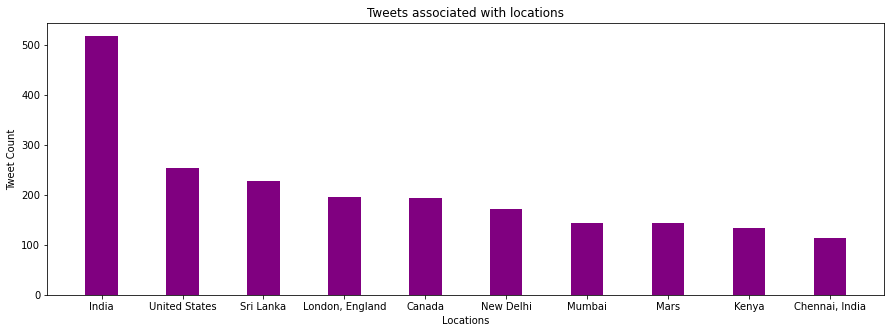

In [25]:
labels = list(top_loc['places'])
values = list(top_loc['tweet_count'])

fig = plt.figure(figsize = (15, 5))
 
# creating the bar plot
plt.bar(labels, values, color ='purple',
        width = 0.4)
 
plt.xlabel("Locations")
plt.ylabel("Tweet Count")
plt.title("Tweets associated with locations")
plt.show()


exploring the sentiment in africa

In [27]:
gr_afr = afr_tweets_df.groupby(['location', 'sentiment']).size().to_frame().reset_index()
gr_afr.columns=['location','sentiment', 'count']
print(gr_afr)
# grouping by country and sentiment
#afr_tweets_df.groupby(['location', 'sentiment']).size().groupby(level=1).max() # grouping by country and sentiment


        location sentiment  count
0          Kenya  negative     12
1          Kenya   neutral     76
2          Kenya  positive     45
3      Mauritius  negative      3
4      Mauritius   neutral     16
5      Mauritius  positive      6
6        Namibia  negative      1
7        Namibia   neutral     30
8        Namibia  positive     10
9   South Africa  negative     15
10  South Africa   neutral     61
11  South Africa  positive     17


<h3>Observations:</h3>
    <li> The majority of tweets associated with african locations have neutral sentiment</li> 
    <li> tweets associated with sourth africa have the largest number of negative sentiment tweets</li>

In [36]:
#filtering dataframe by top locations
top_loc_list = list(top_loc['places'])
top_loc_tweets_df = loc_tweet_df[loc_tweet_df['location'].isin(top_loc_list)]

#grouping by top locations and sentiment
gr_all = top_loc_tweets_df.groupby(['location', 'sentiment']).size().to_frame().reset_index()
gr_all.columns=['location','sentiment', 'count']
print(gr_all)

           location sentiment  count
0            Canada  negative     56
1            Canada   neutral     65
2            Canada  positive     72
3    Chennai, India  negative     12
4    Chennai, India   neutral     55
5    Chennai, India  positive     46
6             India  negative     66
7             India   neutral    278
8             India  positive    174
9             Kenya  negative     12
10            Kenya   neutral     76
11            Kenya  positive     45
12  London, England  negative     34
13  London, England   neutral     73
14  London, England  positive     88
15             Mars  negative     18
16             Mars   neutral     48
17             Mars  positive     77
18           Mumbai  negative     21
19           Mumbai   neutral     73
20           Mumbai  positive     50
21        New Delhi  negative     30
22        New Delhi   neutral     94
23        New Delhi  positive     48
24        Sri Lanka  negative     23
25        Sri Lanka   neutral    152
2

<h3>Observations:</h3>
    <li> The majority of tweets associated with locations have neutral or positive sentiment</li> 
    <li> tweets associated with canada have relatively the largest number of negative sentiment tweets followed by India</li>

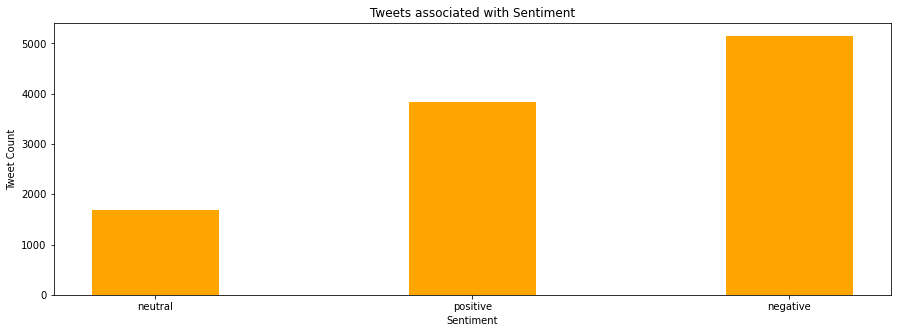

In [41]:


positive = len(sho_tweet_df[sho_tweet_df['sentiment'] == "positive"])
negative = len(sho_tweet_df[sho_tweet_df['sentiment'] == "negative"])
neutral = len(sho_tweet_df[sho_tweet_df['sentiment'] == "neutral"])

labels = ['neutral', 'positive', 'negative']
values = [negative, positive, neutral]

fig = plt.figure(figsize = (15, 5))
 
# creating the bar plot
plt.bar(labels, values, color ='orange',
        width = 0.4)
 
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.title("Tweets associated with Sentiment")
plt.show()

In [42]:
sho_tweet_df.groupby('sentiment')['clean_text'].count()

sentiment
negative    1686
neutral     5150
positive    3832
Name: clean_text, dtype: int64

## Sentiment analysis and modeling

In [45]:
len(sho_tweet_df['polarity'])

16374

In [46]:
sho_tweet_df = sho_tweet_df.drop(sho_tweet_df[sho_tweet_df.sentiment == 'neutral'].index)
sho_tweet_df = sho_tweet_df.reset_index();
sho_tweet_df = sho_tweet_df.drop(columns=['index'])
sho_tweet_df.shape

(11224, 14)

In [47]:
valueArray = pd.Series([1 if row_val == 'positive' else 0 for row_val in sho_tweet_df['sentiment']])

In [48]:
sho_tweet_df['valueArray'] = valueArray
sho_tweet_df.shape

(11224, 15)

In [49]:
X = sho_tweet_df['clean_text']
y = sho_tweet_df['valueArray']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [51]:
print(X_train.size)
print(X_test.size)
print(y_train.size)
print(y_test.size)

8418
2806
8418
2806


In [52]:
count_vect = CountVectorizer()
X_train = X_train.replace(np.nan, '', regex=True)
X_train_counts = count_vect.fit_transform(X_train)
X_train_counts = X_train_counts.toarray()

In [53]:
y_train = y_train.fillna(0)

In [54]:
# scaling the input
clf = make_pipeline(StandardScaler(), SGDClassifier(max_iter=9000, tol=1e-2))

In [ ]:
clf.fit(X_train_counts, y_train)

In [ ]:
X_test = X_test.replace(np.nan, '', regex=True)
# use transform not fit_transform
X_test_counts = count_vect.transform(X_test)
X_test_counts = X_test_counts.toarray()
# prediction = clf.prevaluedict(X_test_counts)
prediction = clf.predict(X_test_counts)

In [ ]:
# making prediction
prediction = clf.predict(X_test_counts)

In [ ]:
np.mean(prediction == y_test)